######**Projekt Informatyka w Medycynie- Symulator tomografu komputerowego**

In [44]:
!pip install pydicom
import datetime
import ipywidgets as widgets
from PIL import Image, ImageOps
from skimage.util import img_as_int
import pydicom
from pydicom.filebase import DicomBytesIO
from pydicom import dcmread
from ipywidgets import FileUpload
from IPython.display import display
import io
import numpy as np
import math
from PIL import Image, ImageOps
from numpy import asarray
from IPython.display import clear_output
import numpy as np
import math
from skimage.transform import radon, rescale
import matplotlib.pyplot as plt
import matplotlib.animation
from pydicom import dcmread
from pydicom.data import get_testdata_file
from __future__ import print_function
from IPython.display import clear_output
import tempfile
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg

In [45]:
def bresenham(x1,y1,x2, y2, n, m):

    dx = x2 - x1
    dy = y2 - y1
 
    is_steep = abs(dy) > abs(dx)
 
    if is_steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    swapped = False
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
        swapped = True

    dx = x2 - x1
    dy = y2 - y1

    error = int(dx / 2.0)
    ystep = 1 if y1 < y2 else -1

    y = y1
    points = []
    for x in range(x1, x2 + 1):
        coord = [y, x] if is_steep else [x, y]
        points.append(coord)
        error -= abs(dy)
        if error < 0:
            y += ystep
            error += dx

    if swapped:
        points.reverse()
    
    return points

In [46]:
def anim_radon(img, da, nn, l, if_filter):
        if if_filter == True:
          filter_vec = []
          for i in range(-4, 4, 1):
              if i == 0:
                  filter_vec.append(1)
              elif i%2 == 0:
                  filter_vec.append(0)
              else:
                  filter_vec.append(-4/(math.pi*math.pi*(i*i)))
        vector = np.zeros((nn,1))
        v = np.zeros((nn,1))
        filename = tempfile.NamedTemporaryFile(suffix=".gif").name
        frames = []
        fig = Figure(figsize=(5, 4), dpi=100)
        canvas = FigureCanvasAgg(fig)
        ax = fig.add_subplot(111)
        dx, dy = 0.5 * 180.0 / max(img.shape), 0.5 / img.shape[0]
        rhomax = math.ceil((img.shape[0]**2 + img.shape[1]**2)**0.5)
        m = round(img.shape[0]/2)
        n = round(img.shape[1]/2)
        r = round( rhomax/2)
        a = 0
        output = np.zeros((nn, math.ceil(180/da)))
        aa = 0
        r = round(rhomax/2)+1
        distances = []
        source =[]
        dedectors = []
        for i in range(0, nn):
            dedectors.append([round(r*math.cos(math.radians(a+(180)-(l/2)+ i* (l/(nn-1))))), 
                                        round(r*math.sin(math.radians(a+(180)-(l/2)+ i* (l/(nn-1)))))])
            source.append([round(r*math.cos(math.radians(a+(0)+(l/2)- i* (l/(nn-1))))), 
                                            round(r*math.sin(math.radians(a+(0)+(l/2)- i* (l/(nn-1)))))])

            
        
        while a < 180:
          
            source =[] 
            dedectors = []
            for i in range(0, nn):
                dedectors.append([round(r*math.cos(math.radians(a+(180)-(l/2)+ i* (l/(nn-1))))), 
                                            round(r*math.sin(math.radians(a+(180)-(l/2)+ i* (l/(nn-1)))))])
                source.append([round(r*math.cos(math.radians(a+(0)+(l/2)- i* (l/(nn-1))))), 
                                            round(r*math.sin(math.radians(a+(0)+(l/2)- i* (l/(nn-1)))))])
            b =0
            gamma = -l/2
            for j in range(0, nn):
                li = bresenham(source[j][0], source[j][1], dedectors[j][0], dedectors[j][1], n, m)
                suma = 0
                num = 0
                for i in li:
                    if i[0]+n < img.shape[0] and i[1] +m<  img.shape[1] and i[0]+n >= 0 and i[1] +m >= 0 :
                        suma += img[i[0]+n][i[1]+m]
                        num +=1
    
                                    
                if num != 0:
                    output[-j, aa] += suma/num
            

                b+=1
                gamma += l/n
              
            if if_filter == True:
              output[:, aa] = np.convolve(output[:,aa], filter_vec, 'same')
              
            a+=da
            aa +=1
            if aa%5 == 0:

                ax.imshow(output, cmap=plt.cm.Greys_r,
               aspect='auto', extent=[0, 180, 0, nn])
                canvas.draw()
                buf = canvas.buffer_rgba()
                X = np.asarray(buf)
                im = Image.fromarray(X)
                frames.append(im.copy())

        arr = output

        frames[0].save(filename, format="GIF", append_images=frames[1:],
                   save_all=True, duration=100, loop=0)
        return [filename, arr]

In [47]:
def my_radon(img, da, nn, l, if_filter):
        
        if if_filter == True:
          filter_vec = []
          for i in range(-4, 4, 1):
              if i == 0:
                  filter_vec.append(1)
              elif i%2 == 0:
                  filter_vec.append(0)
              else:
                  filter_vec.append(-4/(math.pi*math.pi*(i*i)))
        vector = np.zeros((nn,1))
        v = np.zeros((nn,1))
        rhomax = math.ceil((img.shape[0]**2 + img.shape[1]**2)**0.5)
        m = round(img.shape[0]/2)
        n = round(img.shape[1]/2)
        r = round( rhomax/2)
        a = 0
        output = np.zeros((nn, math.ceil(180/da)))
        aa = 0
        r = round(rhomax/2)+1
        distances = []
        source =[]
        dedectors = []
        for i in range(0, nn):
            dedectors.append([round(r*math.cos(math.radians(a+(180)-(l/2)+ i* (l/(nn-1))))), 
                                        round(r*math.sin(math.radians(a+(180)-(l/2)+ i* (l/(nn-1)))))])
            source.append([round(r*math.cos(math.radians(a+(0)+(l/2)- i* (l/(nn-1))))), 
                                            round(r*math.sin(math.radians(a+(0)+(l/2)- i* (l/(nn-1)))))])

            
        
        while a < 180:
            source =[]
            dedectors = []
            for i in range(0, nn):
                dedectors.append([round(r*math.cos(math.radians(a+(180)-(l/2)+ i* (l/(nn-1))))), 
                                            round(r*math.sin(math.radians(a+(180)-(l/2)+ i* (l/(nn-1)))))])
                source.append([round(r*math.cos(math.radians(a+(0)+(l/2)- i* (l/(nn-1))))), 
                                            round(r*math.sin(math.radians(a+(0)+(l/2)- i* (l/(nn-1)))))])
            b =0
            gamma = -l/2
            for j in range(0, nn):
                li = bresenham(source[j][0], source[j][1], dedectors[j][0], dedectors[j][1], n, m)
                suma = 0
                num = 0
                for i in li:
                    if i[0]+n < img.shape[0] and i[1] +m<  img.shape[1] and i[0]+n >= 0 and i[1] +m >= 0 :
                        suma += img[(i[0]+n)][(i[1]+m)]
                        num +=1

                if num != 0:
                    output[-j, aa] += suma/num
  
                b+=1
                gamma += l/n
            if if_filter == True:
              output[:, aa] = np.convolve(output[:,aa], filter_vec, 'same')  
            a+=da
            aa +=1

        fig = Figure(figsize=(5, 4), dpi=100)
        canvas = FigureCanvasAgg(fig)
        ax = fig.add_subplot(111)
        ax.imshow(output, cmap=plt.cm.Greys_r,
        aspect='auto', extent=[0, 180, 0, nn])
        canvas.draw()
        buf = canvas.buffer_rgba()

        X = np.asarray(buf)
        im = Image.fromarray(X)
        arr = output
        return [im, arr]

In [48]:
filter = widgets.Checkbox(
    value=False,
    description='Filtrowanie odwrotnej transformaty',
    disabled=False,
    indent=False
)

with_anim = widgets.Checkbox(
    value=False,
    description='Pokazywnie kroków',
    disabled=False,
    indent=False
)
step =  widgets.Textarea(
    value='1',
    description='Krok detektora:',
    disabled=False,
    style = {'description_width': 'initial'}
)
angle =  widgets.Textarea(
    value='180',
    description='Rozpietosc katowa:',
    disabled=False,
    style = {'description_width': 'initial'}
)
number =  widgets.Textarea(
    value='180',
    description='Ilość detektorów:',
    disabled=False,
    style = {'description_width': 'initial'}
)

In [49]:
name =  widgets.Textarea(
    value='Imie i nazwisko',
    description='Krok dedektora:',
    disabled=False,
    style = {'description_width': 'initial'}
)
save = widgets.Checkbox(
    value=False,
    description='Zapis zreknstruowanego obrazu',
    disabled=False,
    indent=False
)

In [50]:
def inv_anim_radon(img, da, nn, l, len, len1):
        filename = tempfile.NamedTemporaryFile(suffix=".gif").name
        frames = []
        fig = Figure(figsize=(5, 4), dpi=100)
        canvas = FigureCanvasAgg(fig)
        ax = fig.add_subplot(111)
        rhomax = math.ceil((len**2 + len1**2)**0.5)

        m = math.ceil(len/2)
        n =math.ceil(len1/2)
        r = round( rhomax/2)
        a = 0
        output = np.zeros((len, len1))
        aa = 0
        r = round(rhomax/2)+1
        distances = []
        source =[]
        dedectors = []
        for i in range(0, nn):
            dedectors.append([round(r*math.cos(math.radians(a+(180)-(l/2)+ i* (l/(nn-1))))), 
                                        round(r*math.sin(math.radians(a+(180)-(l/2)+ i* (l/(nn-1)))))])
            source.append([round(r*math.cos(math.radians(a+(0)+(l/2)- i* (l/(nn-1))))), 
                                            round(r*math.sin(math.radians(a+(0)+(l/2)- i* (l/(nn-1)))))])

        
        while a < 180:
            source =[] 
            dedectors = []
            for i in range(0, nn):
                dedectors.append([round(r*math.cos(math.radians(a+(180)-(l/2)+ i* (l/(nn-1))))), 
                                            round(r*math.sin(math.radians(a+(180)-(l/2)+ i* (l/(nn-1)))))])
                source.append([round(r*math.cos(math.radians(a+(0)+(l/2)- i* (l/(nn-1))))), 
                                            round(r*math.sin(math.radians(a+(0)+(l/2)- i* (l/(nn-1)))))])
            b =0
            gamma = -l/2
            for j in range(0, nn):
                li = bresenham(source[j][0], source[j][1], dedectors[j][0], dedectors[j][1], n, m)
                suma = 0
                for i in li:
                    if i[0]+n < len and i[1] +m< len1 and i[0]+n >= 0 and i[1] +m >= 0 :
                        output[-1*(i[0]+n)][-1*(i[1]+m)] += img[j, aa]
                b+=1
                gamma += l/n
                
            a+=da
            aa +=1
            if aa%5 == 0:

              ax.imshow(output, cmap=plt.cm.Greys_r,
               aspect='auto', extent=[0, n, 0, m])
              canvas.draw()
              buf = canvas.buffer_rgba()
              X = np.asarray(buf)
              im = Image.fromarray(X)
              frames.append(im.copy())
        arr = output     
        arr = arr - np.min(arr)
        arr = arr / np.max(arr)
        arr = np.rint(arr *255)
        frames[0].save(filename, format="GIF", append_images=frames[1:],
                   save_all=True, duration=100, loop=2)
        return [filename, arr]

In [51]:
def inv_radon(img, da, nn, l, len, len1):
        filename = tempfile.NamedTemporaryFile(suffix=".gif").name
        frames = []
        fig = Figure(figsize=(5, 4), dpi=100)
        canvas = FigureCanvasAgg(fig)
        ax = fig.add_subplot(111)
        rhomax = math.ceil((len**2 + len1**2)**0.5)

        m = math.ceil(len/2)
        n =math.ceil(len1/2) 
        r = round( rhomax/2)
        a = 0
        output = np.zeros((len, len1))
        aa = 0
        r = round(rhomax/2)+1
        distances = []
        source =[]
        dedectors = []
        for i in range(0, nn):
            dedectors.append([round(r*math.cos(math.radians(a+(180)-(l/2)+ i* (l/(nn-1))))), 
                                        round(r*math.sin(math.radians(a+(180)-(l/2)+ i* (l/(nn-1)))))])
            source.append([round(r*math.cos(math.radians(a+(0)+(l/2)- i* (l/(nn-1))))), 
                                            round(r*math.sin(math.radians(a+(0)+(l/2)- i* (l/(nn-1)))))])

        
        while a < 180:
            source =[] 
            dedectors = []
            for i in range(0, nn):
                dedectors.append([round(r*math.cos(math.radians(a+(180)-(l/2)+ i* (l/(nn-1))))), 
                                            round(r*math.sin(math.radians(a+(180)-(l/2)+ i* (l/(nn-1)))))])
                source.append([round(r*math.cos(math.radians(a+(0)+(l/2)- i* (l/(nn-1))))), 
                                            round(r*math.sin(math.radians(a+(0)+(l/2)- i* (l/(nn-1)))))])
            b =0
            gamma = -l/2
            for j in range(0, nn):
                li = bresenham(source[j][0], source[j][1], dedectors[j][0], dedectors[j][1], n, m)
                suma = 0
                for i in li:
                    if i[0]+n < len and i[1] +m< len1 and i[0]+n >= 0 and i[1] +m >= 0 :
                        output[-1*(i[0]+n)][-1*(i[1]+m)] += img[j, aa]
                b+=1
                gamma += l/n
                
            a+=da
            aa +=1

        ax.imshow(output, cmap=plt.cm.Greys_r,
          aspect='auto', extent=[0, len, 0, len1])
        canvas.draw()
        buf = canvas.buffer_rgba()
        X = np.asarray(buf)
        im = Image.fromarray(X)

        arr = output     
        arr = arr - np.min(arr)
        arr = arr / np.max(arr)
        arr = np.rint(arr *255)
        return [im, arr]

In [52]:
def start():
  global upload
  upload = FileUpload(accept='', multiple=False, description='Upload jpg or dcm file')
  display(upload)
  display(filter)
  display(with_anim)
  display(step)
  display(angle)
  display(number)
  button = widgets.Button(description="Rozpocznij")
  output = widgets.Output()
  output2 = widgets.Output()
  display(button, output, output2)

  def on_button_clicked(b):
    
    with output:
      for uploaded_filename in upload.value:
        clear_output(wait=True)
        print(uploaded_filename)
        if (uploaded_filename[uploaded_filename.find('.'):] == '.dcm'):
          content = upload.value[uploaded_filename]['content'] 
          dt = dcmread(io.BytesIO(content))
          img = dt.pixel_array
          im = Image.fromarray(img)
          display(im)

        else:
          content = upload.value[uploaded_filename]['content']  
          img = Image.open(io.BytesIO(content))
          img = ImageOps.grayscale(img)
          display(img)
          img = np.asarray(img)
    global obrazek      
    if with_anim.value == True:
      i = anim_radon(img,float(step.value),int(float(number.value)),float(angle.value), filter.value)
      f = open(i[0], 'rb')
      f= f.read()
      imgg = widgets.Image(value = f)
      display(imgg)
      i2 = inv_anim_radon(i[1], float(step.value),int(float(number.value)),float(angle.value), img.shape[0], img.shape[1])
      f2 = open(i2[0], 'rb')
      f2= f2.read()
      imgg = widgets.Image(value = f2)
      display(imgg)
      mes = np.sqrt(((img-i2[1])**2).mean())
      obrazek = i2[1]
      print("RMSE: ", mes)
      

    else:
      i = my_radon(img,float(step.value),int(float(number.value)),float(angle.value), filter.value)
      buf = io.BytesIO()
      i[0].save(buf, format='PNG')
      imgg = widgets.Image(value = buf.getvalue())
      display(imgg)
      buf2 = io.BytesIO()

      i2 = inv_radon(i[1],float(step.value),int(float(number.value)),float(angle.value),img.shape[0], img.shape[1])
      i2[0].save(buf2, format='PNG')
      imgg2 = widgets.Image(value = buf2.getvalue())
      display(imgg2)
      print("RMSE: ", np.sqrt(((img-i2[1])**2).mean()))

      obrazek = i2[1]
      
  button.on_click(on_button_clicked)

  

In [53]:
s_file = widgets.Textarea(
    value='',
    placeholder='Wpisz nazwe pliku',
    description='Nazwa pliku:',
    disabled=False,
    style = {'description_width': 'initial'}
)
save_with = widgets.Checkbox(
    value=False,
    description='Zapisz zdjęcie',
    disabled=False,
    indent=False
)
save_old = widgets.Checkbox(
    value=False,
    description='Nadpisz plik',
    disabled=False,
    indent=False
) 

id_p = widgets.Textarea(
    value='',
    placeholder='Wpisz ID pacjenta',
    description='ID:',
    disabled=False,
    style = {'description_width': 'initial'}
)
first_name = widgets.Textarea(
    value='',
    placeholder='Wpisz imię',
    description='Imię:',
    disabled=False,
    style = {'description_width': 'initial'}
)
surname = widgets.Textarea(
    value='',
    placeholder='Wpisz nazwisko',
    description='Nazwisko:',
    disabled=False,
    style = {'description_width': 'initial'}
)
sex_p = widgets.Textarea(
    value='',
    placeholder='Wpisz płeć',
    description='Płeć:',
    disabled=False,
    style = {'description_width': 'initial'}
)
birth_d = widgets.Textarea(
    value='',
    placeholder='Wpisz date urodzenia',
    description='Data urodzenia:',
    disabled=False,
    style = {'description_width': 'initial'}
)
study_d = widgets.Textarea(
    value='',
    placeholder='Wpisz date badania',
    description='Data badania:',
    disabled=False,
    style = {'description_width': 'initial'}
)
comments = widgets.Textarea(
    value='',
    placeholder='Wpisz komentarz',
    description='Komentarz:',
    disabled=False,
    style = {'description_width': 'initial'}
)

In [54]:
def write_DICOM(list, flag1, flag2, filename):
  
  image = obrazek
  if flag2 == True:
    ds = DICOM_data
  else:
    suffix = '.dcm'
    filect = get_testdata_file('CT_small.dcm')
    ds = pydicom.dcmread(filect)
  
  if list[0]!='':
    ds.PatientID = list[0]
  else:
    print('Brak ID')
    return
  if (list[1]!='') and (list[2]!=''):
    ds.PatientName = '{}^{}'.format(list[2], list[1])
  if list[3]!='':
    ds.PatientSex = list[3]
  if list[4]!='':
    ds.PatientBirthDate = list[4]
  if list[5]!='':
    ds.ImageComments = list[5]
  if list[6]!='':
    ds.PatientBirthDate = list[6]
  if list[7]!='':
    ds.StudyDate = list[7]
  
  if flag1==True:
    ds.Rows, ds.Columns = image.shape[0], image.shape[1]
    ds.PixelRepresentation = 0
    ds.BitsAllocated = 16
    if image.dtype != np.uint16:
      pixel_array = image.astype(np.uint16)
    ds.PixelData = pixel_array.tobytes()
  
  ds.save_as(filename)
  print(filename)
  return



def read_DICOM(path):
  picture = 0
  res = ['',['',''],'','','','','']
  for uploaded_filename in path.value:
          res[6] = uploaded_filename
          content = path.value[uploaded_filename]['content']
          raw = DicomBytesIO(content)
          dt = dcmread(raw)

  for item in dt:
      if (item.keyword == 'PatientID'):
        res[0] = dt.PatientID
      if (item.keyword == 'PatientName'):
        res[1][0] = dt.PatientName.given_name
        res[1][1] = dt.PatientName.family_name
      if (item.keyword == 'PatientSex'):
        res[2] = dt.PatientSex
      if (item.keyword == 'PatientBirthDate'):
        res[3] = dt.PatientBirthDate
      if (item.keyword == 'StudyDate'):
        res[4] = dt.StudyDate
      if (item.keyword == 'ImageComments'):
        res[5] = dt.ImageComments
      if (item.keyword == 'PixelData'):
        picture = 1

  if (picture == 1):
    plt.imshow(dt.pixel_array, cmap='gray')
  return dt, res

In [55]:
def start2():

  
  readbutton = widgets.Button(description="Click to Read")
  output3 = widgets.Output()
  display(readbutton, output3)
  display(s_file)
  display(id_p)
  display(first_name)
  display(surname)
  display(sex_p)
  display(birth_d)
  display(study_d)
  display(comments)
  display(save_with)
  display(save_old)
  savebutton = widgets.Button(description="Click to Save")
  output4 = widgets.Output()
  display(savebutton, output4)
  
  def on_read_button_clicked(b):
    with output3:
      global DICOM_data
      clear_output(wait=True)
      for uploaded_filename in upload.value:
        if uploaded_filename[-4:]!='.dcm':
          print('Otrzymano plik {}, spodziewano sie .dcm'.format(uploaded_filename[-4:]))
          return
      DICOM_data, values = read_DICOM(upload)
      s_file.value = values[6]
      id_p.value = values[0]
      first_name.value = values[1][0]
      surname.value = values[1][1]
      sex_p.value = values[2]
      birth_d.value = values[3]
      study_d.value = values[4]
      comments.value = values[5]
      
      
  readbutton.on_click(on_read_button_clicked)
  
  def on_save_button_clicked(b):
    with output4:
      box_data = [id_p.value,
      first_name.value,
      surname.value,
      sex_p.value,
      birth_d.value,
      comments.value,
      birth_d.value,
      study_d.value]
      write_DICOM(box_data, save_with.value, save_old.value, s_file.value)
      
  savebutton.on_click(on_save_button_clicked)
  return




 
# Transformata Radona

In [57]:
start()

FileUpload(value={}, description='Upload jpg or dcm file')

Checkbox(value=False, description='Filtrowanie odwrotnej transformaty', indent=False)

Checkbox(value=True, description='Pokazywnie kroków', indent=False)

Textarea(value='1', description='Krok detektora:', style=DescriptionStyle(description_width='initial'))

Textarea(value='180', description='Rozpietosc katowa:', style=DescriptionStyle(description_width='initial'))

Textarea(value='180', description='Ilość detektorów:', style=DescriptionStyle(description_width='initial'))

Button(description='Rozpocznij', style=ButtonStyle())

Output()

Output()

# Obsługa Dicom

Button(description='Click to Read', style=ButtonStyle())

Output()

Textarea(value='', description='Nazwa pliku:', placeholder='Wpisz nazwe pliku', style=DescriptionStyle(descrip…

Textarea(value='', description='ID:', placeholder='Wpisz ID pacjenta', style=DescriptionStyle(description_widt…

Textarea(value='', description='Imię:', placeholder='Wpisz imię', style=DescriptionStyle(description_width='in…

Textarea(value='', description='Nazwisko:', placeholder='Wpisz nazwisko', style=DescriptionStyle(description_w…

Textarea(value='', description='Płeć:', placeholder='Wpisz płeć', style=DescriptionStyle(description_width='in…

Textarea(value='', description='Data urodzenia:', placeholder='Wpisz date urodzenia', style=DescriptionStyle(d…

Textarea(value='', description='Data badania:', placeholder='Wpisz date badania', style=DescriptionStyle(descr…

Textarea(value='', description='Komentarz:', placeholder='Wpisz komentarz', style=DescriptionStyle(description…

Checkbox(value=False, description='Zapisz zdjęcie', indent=False)

Checkbox(value=False, description='Nadpisz plik', indent=False)

Button(description='Click to Save', style=ButtonStyle())

Output()

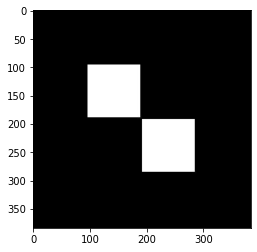

In [30]:
start2()

In [ ]:
%cd

/root
